In [1]:
import sys
sys.path.append('..')

In [2]:
from workspace import nometools as nome

In [3]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import pickle
import scipy
from scipy import stats

In [4]:
main_path = '/home/kevin/DNA-Methylation-patterns/'
data_path = main_path + 'downstream/chr1_w200/'
steric_path = main_path + 'downstream/steric_clash/'

In [5]:
np.random.seed(1234)

#### Promoter annotation and sorting

In [6]:
## Getting promoters from refGene

# infile = data_path + 'refGene'
# outfile = data_path + 'refGene.promoters.bed'
# nome.get_promoters_refGene(infile, outfile)

In [7]:
outfile = data_path + 'refGene.promoters.bed'
print('no of promoters :', nome.get_num_reads(outfile))

no of promoters : 32386


In [8]:
## sorting bed files promoter

# infile = data_path + 'refGene.promoters.bed'
# outfile = data_path + 'refGene.promoters.sorted.bed'

# nome.sort_bed(infile, outfile)

In [9]:
# ## filtering for chr1 

# infile = data_path + 'refGene.promoters.sorted.bed'
# outfile = data_path + 'refGene.promoters.sorted.chr1.bed'
# chrs = ['chr1']
# n = 0
# with open(infile, 'r') as fin:
#     n = sum(1 for _ in fin)

# progress_check = int(n/10)
# res = []
# itr = 0
# with open(outfile, 'w') as fout:
#     with open(infile, 'r') as fin:
#         print('start traversing bed file ', infile, 'n = ', n)
#         curr_time = time.time()
#         for line in fin:
#             if itr != 0 and itr%progress_check == 0:
#                 print('progress : {}% and time elapsed {} min'.format(round(itr*100/n,2), round((time.time()-curr_time)/60,2)))
            
#             itr += 1
#             line_s = line.strip().split('\t')
#             chr = line_s[0]
#             if chr in chrs:
#                 start = line_s[1]
#                 end = line_s[2]
#                 refid = line_s[3]
#                 geneName = line_s[4]
#                 txStart = line_s[5]
#                 txEnd = line_s[6]
#                 strand = line_s[7]

#                 fout.write('\t'.join([str(s) for s in [chr, start, end, refid, geneName, txStart, txEnd, strand]]) + '\n')

#### GCH filtering and intersection

In [10]:
## Filtering GCH file
## Filtering for reads with coverage >= 3

# infile = data_path + 'cpg.raw.sort.GCH.bed'
# outfile = data_path + 'GCH.filtered.bed'

# nome.filter_bed_files(infile, outfile)

In [11]:
# infile = data_path + 'cpg.raw.sort.GCH.bed'
# outfile = data_path + 'GCH.filtered.bed'
# ni = nome.get_num_reads(infile)
# no = nome.get_num_reads(outfile)
# print('no of reads in GCH file :', ni)
# print('no of reads in filtered GCH file :', no)
# print('percentage of reads remaining {}%'.format(round(no*100/ni, 2)))

In [12]:
## sorting bed files GCH

# infile = data_path + 'GCH.filtered.bed'
# outfile = data_path + 'GCH.filtered.sorted.bed'

# nome.sort_bed(infile, outfile)

In [13]:
# infile = data_path + 'GCH.filtered.sorted.bed'
# res = nome.filter_by_chr(infile, chrs=['chr1'])

In [14]:
# len(res), res[0], res[-1]

In [15]:
# # writing filter GCH file
# # Filter by chr1

# outfile = data_path + 'GCH.filtered.sorted.chr1.bed'
# with open(outfile, 'w') as fout:
#     for reg in res:
#         fout.write('\t'.join([str(x) for x in reg]) + '\n')

In [16]:
# # GCH intersect with promoter

# promoters_sorted = data_path + 'refGene.promoters.sorted.chr1.bed'
# gch_sorted = data_path + 'GCH.filtered.sorted.chr1.bed'
# outfile = data_path + 'GCH.promoter.intersect.bed'

# nome.intersect_bed(promoters_sorted, gch_sorted, outfile)

In [17]:
outfile = data_path + 'GCH.promoter.intersect.bed'
print('no of reads in promoter region :', nome.get_num_reads(outfile))

no of reads in promoter region : 287287


In [18]:
outfile = data_path + 'refGene.promoters.sorted.chr1.bed'
print('no of promoters :', nome.get_num_reads(outfile))

no of promoters : 3270


In [19]:
infile = data_path + 'GCH.promoter.intersect.bed'
_, df = nome.get_promoter_methylation(infile)

In [20]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001005277-621034,NM_001005277,OR4F16,chr1,621034,624034,621095,622034,-,622849,622850,1184,-816,33.33,3
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857344,857345,42,-1958,66.67,3
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857350,857351,48,-1952,20.00,5
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857351,857352,49,-1951,66.67,3
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857391,857392,89,-1911,50.00,4


In [21]:
df.shape

(286313, 15)

In [22]:
print('no of promoters : ', df['trans_id'].unique().shape)

no of promoters :  (3208,)


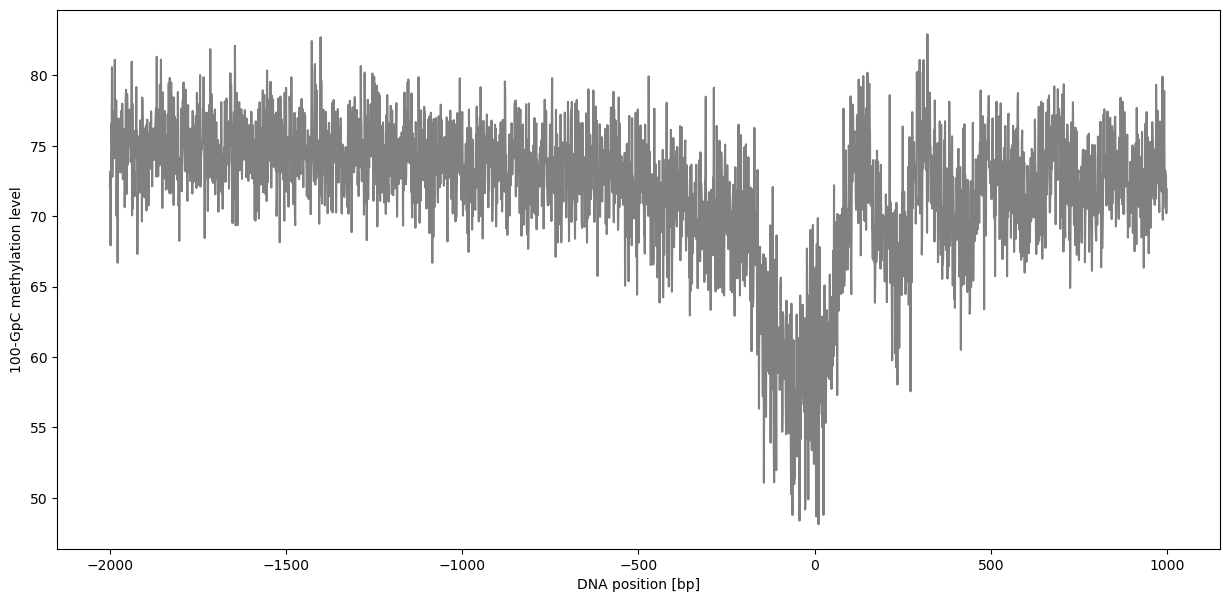

In [23]:
nome.plot_avg_methylation_levels(df, 'GCH')

#### HCG filtering and intersection

In [24]:
## Filtering HCG file
## Filtering for reads with coverage >= 3

# infile = data_path + 'cpg.raw.sort.HCG.bed'
# outfile = data_path + 'HCG.filtered.bed'

# nome.filter_bed_files(infile, outfile)

In [25]:
# infile = data_path + 'cpg.raw.sort.HCG.bed'
# outfile = data_path + 'HCG.filtered.bed'
# ni = nome.get_num_reads(infile)
# no = nome.get_num_reads(outfile)
# print('no of reads in HCG file :', ni)
# print('no of reads in filtered HCG file :', no)
# print('percentage of reads remaining {}%'.format(round(no*100/ni, 2)))

In [26]:
## sorting bed files HCG

# infile = data_path + 'HCG.filtered.bed'
# outfile = data_path + 'HCG.filtered.sorted.bed'

# nome.sort_bed(infile, outfile)

In [27]:
# infile = data_path + 'HCG.filtered.sorted.bed'
# res = nome.filter_by_chr(infile, chrs=['chr1'])

In [28]:
# len(res), res[0], res[-1]

In [29]:
# # writing filter HCG file
# # Filter by chr1

# outfile = data_path + 'HCG.filtered.sorted.chr1.bed'
# with open(outfile, 'w') as fout:
#     for reg in res:
#         fout.write('\t'.join([str(x) for x in reg]) + '\n')

In [30]:
# # HCG intersect with promoter

# promoters_sorted = data_path + 'refGene.promoters.sorted.chr1.bed'
# hcg_sorted = data_path + 'HCG.filtered.sorted.chr1.bed'
# outfile = data_path + 'HCG.promoter.intersect.bed'

# nome.intersect_bed(promoters_sorted, hcg_sorted, outfile)

In [31]:
infile = data_path + 'HCG.promoter.intersect.bed'
_, df = nome.get_promoter_methylation(infile)

In [32]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857395,857396,93,-1907,0.00,5
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857396,857397,94,-1906,75.00,4
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857943,857944,641,-1359,100.00,3
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857994,857995,692,-1308,33.33,3
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,858087,858088,785,-1215,33.33,3


In [33]:
df.shape

(79882, 15)

In [34]:
print('no of promoters : ', df['trans_id'].unique().shape)

no of promoters :  (3197,)


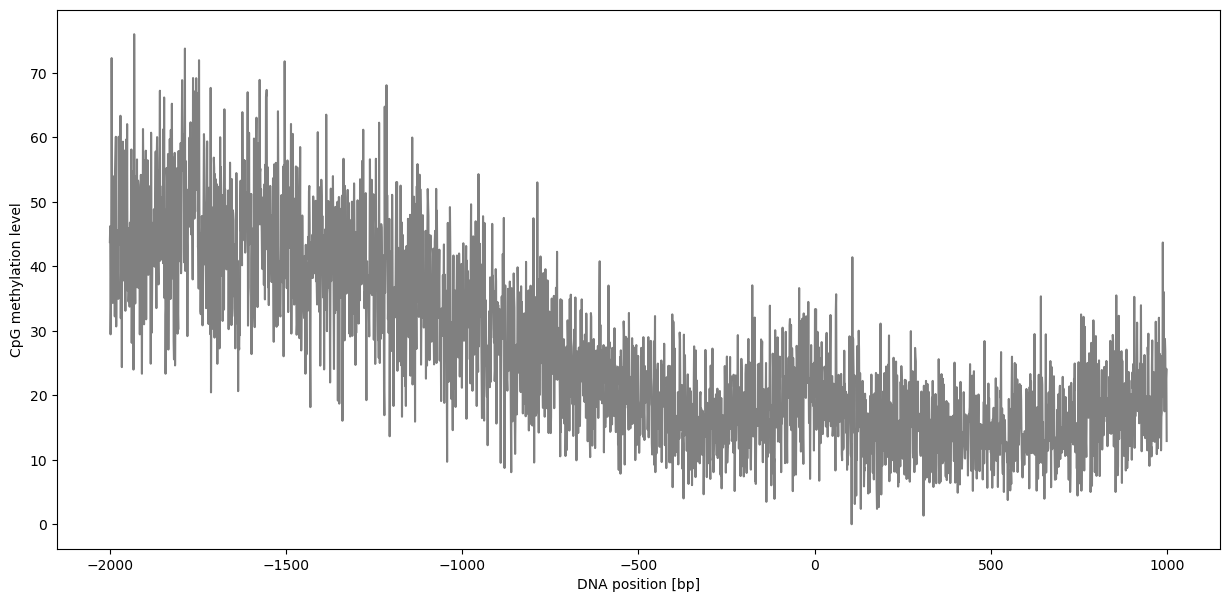

In [35]:
nome.plot_avg_methylation_levels(df, 'HCG')

In [36]:
# df_random = df.copy()
# df_random['meth_rate'] = df_random['meth_rate'].sample(frac=1).reset_index(drop=True)

In [37]:
# outfile = data_path + 'HCG.random.promoter.intersect.bed'
# cols = ['chrom', 'promoter_start', 'promoter_end', 'refid', 'gene_name', 'TSS', 'TES', 'strand', 'chrom', 'meth_start_genome', 'meth_end_genome', 'strand', 'meth_rate', 'coverage']
# df_random[cols].to_csv(outfile, sep='\t', header=False, index=False)

In [38]:
infile = data_path + 'HCG.random.promoter.intersect.bed'
_, df_random = nome.get_promoter_methylation(infile)

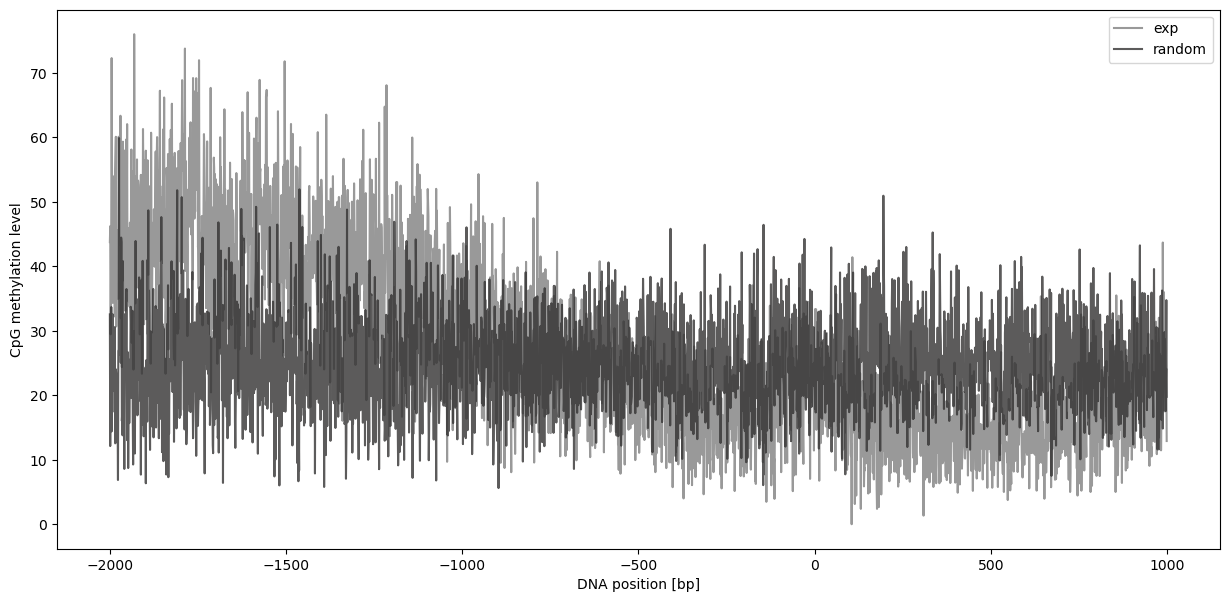

In [39]:
nome.plot_avg_methylation_levels(df, 'HCG', label='exp')
nome.plot_avg_methylation_levels(df_random, 'HCG', fig=False, c='#333232', label='random')

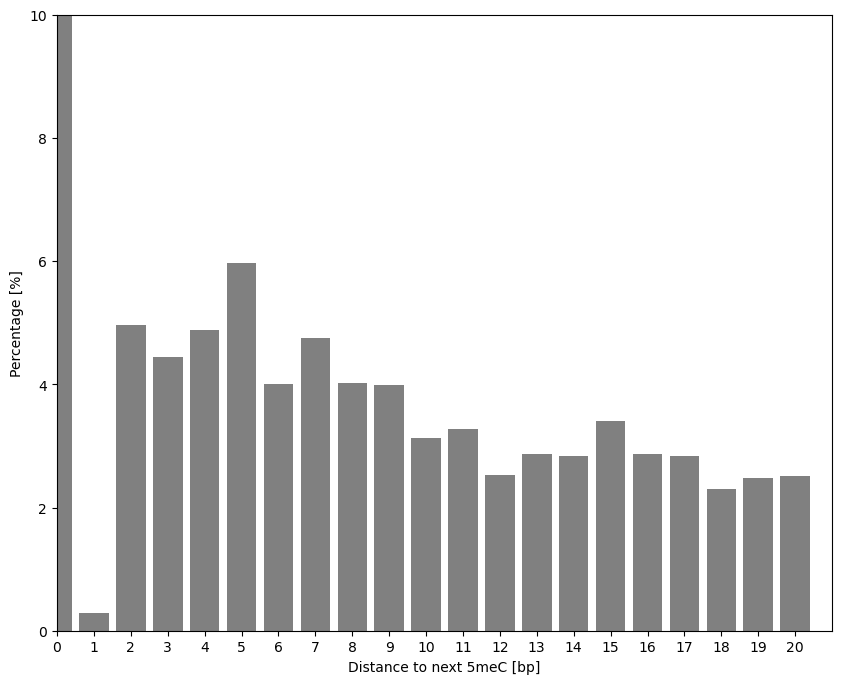

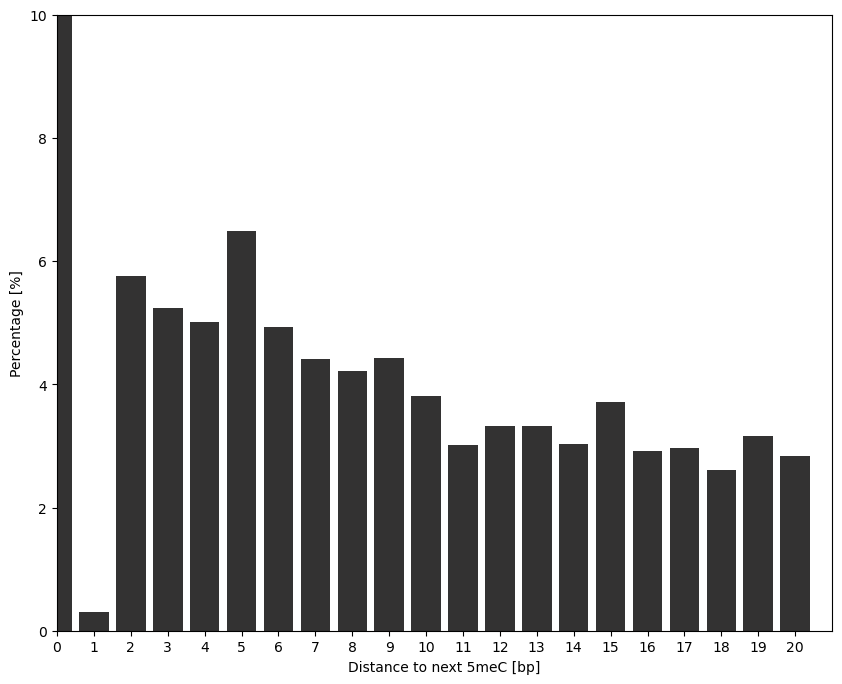

In [40]:
nome.plot_CpG_CpG_dist(df)
nome.plot_CpG_CpG_dist(df_random, c='#333232')

#### NDR (LNDR) regions GCH

In [41]:
# infile = data_path + 'GCH.filtered.sorted.chr1.bed'
# print('no of reads :', nome.get_num_reads(infile))
# res = nome.filter_by_chr(infile, chrs=['chr1'])

no of reads : 8004403
start traversing bed file  /home/kevin/DNA-Methylation-patterns/downstream/chr1_w200/GCH.filtered.sorted.chr1.bed n =  8004403
progress : 10.0% and time elapsed 0.05 min
progress : 20.0% and time elapsed 0.1 min
progress : 30.0% and time elapsed 0.15 min
progress : 40.0% and time elapsed 0.2 min
progress : 50.0% and time elapsed 0.25 min
progress : 60.0% and time elapsed 0.3 min
progress : 70.0% and time elapsed 0.35 min
progress : 80.0% and time elapsed 0.39 min
progress : 90.0% and time elapsed 0.45 min
progress : 100.0% and time elapsed 0.48 min


In [42]:
# len(res), res[0], res[-1]

(8004403,
 ['chr1', 13026, 13027, '+', 0.0, 3],
 ['chr1', 249239673, 249239674, '+', 33.33, 3])

In [43]:
# ndrs = nome.findNDR(res, win_len=200)

Finding NDR windows || window len, 200
progress : 5.0% and time elapsed 9.02 min
progress : 10.0% and time elapsed 18.69 min
progress : 15.0% and time elapsed 27.74 min
progress : 20.0% and time elapsed 37.44 min
progress : 25.0% and time elapsed 45.56 min
progress : 30.0% and time elapsed 50.43 min
progress : 35.0% and time elapsed 55.96 min
progress : 40.0% and time elapsed 60.14 min
progress : 45.0% and time elapsed 63.45 min
progress : 50.0% and time elapsed 66.99 min
progress : 55.0% and time elapsed 67.01 min
progress : 60.0% and time elapsed 68.93 min
progress : 65.0% and time elapsed 72.91 min
progress : 70.0% and time elapsed 80.82 min
progress : 75.0% and time elapsed 89.68 min
progress : 80.0% and time elapsed 96.73 min
progress : 85.0% and time elapsed 103.65 min
progress : 90.0% and time elapsed 110.99 min
progress : 95.0% and time elapsed 119.02 min
progress : 100.0% and time elapsed 126.01 min
Merging found windows
progress : 10.0% and time elapsed 0.0 min


In [44]:
# outfile = data_path + 'GCH.NDR.chr1.bed'
# with open(outfile, 'w') as fout:
#     for reg in ndrs:
#         temp = ['chr1', str(reg[0]), str(reg[1])]
#         fout.write('\t'.join(temp) + '\n')

In [45]:
# print('no of ndrs ', len(ndrs))

no of ndrs  8237


In [46]:
# promoters_sorted = data_path + 'refGene.promoters.sorted.chr1.bed'
# ndrfile = data_path + 'GCH.NDR.chr1.bed'
# outfile = data_path + 'GCH.NDR.promoter.intersect.bed'
# nome.intersect_bed(promoters_sorted, ndrfile, outfile)

In [47]:
infile = data_path + 'GCH.NDR.promoter.intersect.bed'
df = nome.get_nuc_positions(infile)

In [48]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,2553,2953,553,953,400
1,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,954676,955036,1177,1537,-823,-463,360
2,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955736,956036,2237,2537,237,537,300
3,NM_001363525-1050469,NM_001363525,C1orf159,chr1,1050469,1053469,1017202,1051469,-,1051496,1051936,1533,1973,-467,-27,440
4,NM_152228-1264659,NM_152228,TAS1R3,chr1,1264659,1267659,1266659,1270694,+,1265076,1265356,417,697,-1583,-1303,280


In [49]:
df_filtered = df.copy()

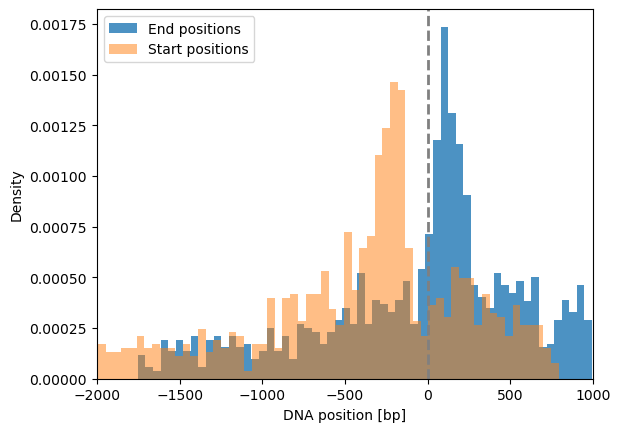

In [50]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_filtered['nuc_end_promo_rel'],  bins = 60, histtype='bar', density=True, label="End positions", alpha = 0.8)  
plt.hist(df_filtered['nuc_start_promo_rel'], bins = 60, histtype='bar', density=True, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()

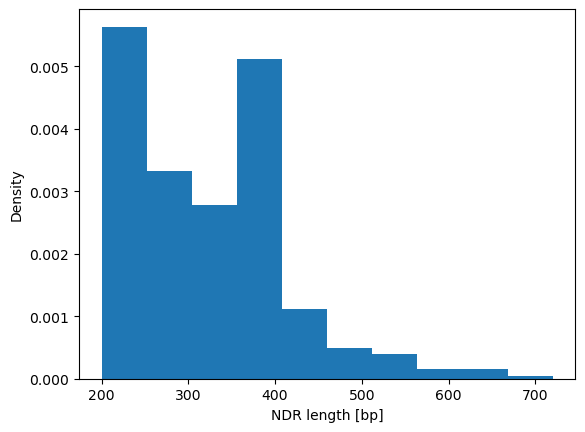

In [51]:
plt.figure()

plt.hist(df_filtered['region_length'], bins=10, histtype='bar', density=True)  

plt.xlabel("NDR length [bp]")
plt.ylabel("Density")
plt.show()

#### NOR (HNDR) Regions GCH

In [52]:
# infile = data_path + 'GCH.NDR.chr1.bed'
# sizes = data_path + 'hg19.chrom.sizes'
# outfile = data_path + 'GCH.NOR.chr1.bed'
# nome.complement_bed(infile, sizes, outfile)

In [53]:
# promoters_sorted = data_path + 'refGene.promoters.sorted.chr1.bed'
# ndrfile = data_path + 'GCH.NOR.chr1.bed'
# outfile = data_path + 'GCH.NOR.promoter.intersect.bed'
# nome.intersect_bed(promoters_sorted, ndrfile, outfile)

In [54]:
infile = data_path + 'GCH.NOR.promoter.intersect.bed'
df = nome.get_nuc_positions(infile)

In [55]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,1537,2237,-463,237,700
1,NM_152228-1264659,NM_152228,TAS1R3,chr1,1264659,1267659,1266659,1270694,+,1265356,1267316,697,2657,-1303,657,1960
2,NM_001282583-1296179,NM_001282583,MXRA8,chr1,1296179,1299179,1288070,1297179,-,1297716,1298456,723,1463,-1277,-537,740
3,NM_178545-1849718,NM_178545,TMEM52,chr1,1849718,1852718,1849029,1850718,-,1849856,1851296,1422,2862,-578,862,1440
4,NM_178545-1849718,NM_178545,TMEM52,chr1,1849718,1852718,1849029,1850718,-,1851536,1852536,182,1182,-1818,-818,1000


In [56]:
# df_filtered = df[df['region_length'] > 147].copy()
df_filtered = df.copy()

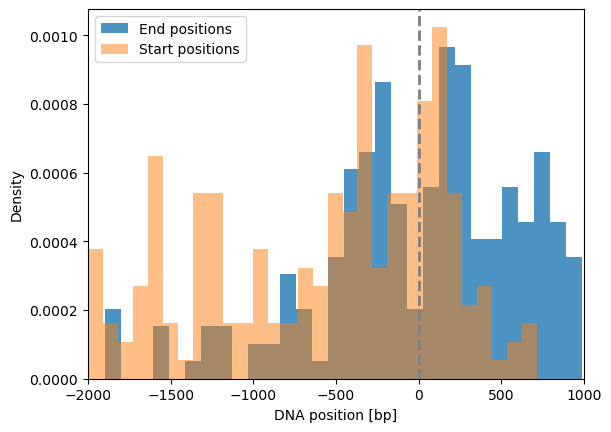

In [57]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_filtered['nuc_end_promo_rel'],  bins = 30, histtype='bar', density=True, label="End positions", alpha = 0.8)  
plt.hist(df_filtered['nuc_start_promo_rel'], bins = 30, histtype='bar', density=True, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()

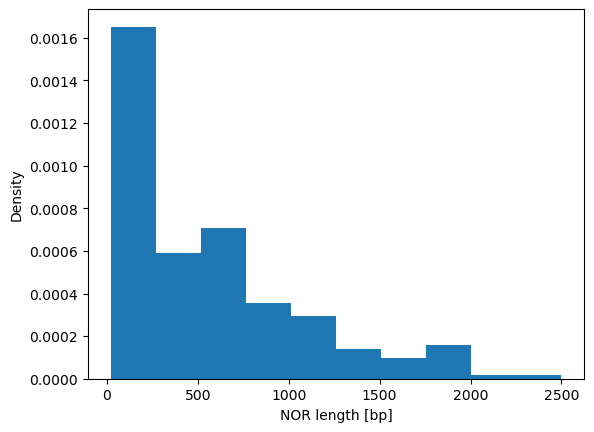

In [58]:
plt.figure()

plt.hist(df_filtered['region_length'], bins=10, histtype='bar', density=True)  

plt.xlabel("NOR length [bp]")
plt.ylabel("Density")
plt.show()

#### Steric Clash and x_clash dict creation

max_clash 65.72379367720465
min_clash 0.0


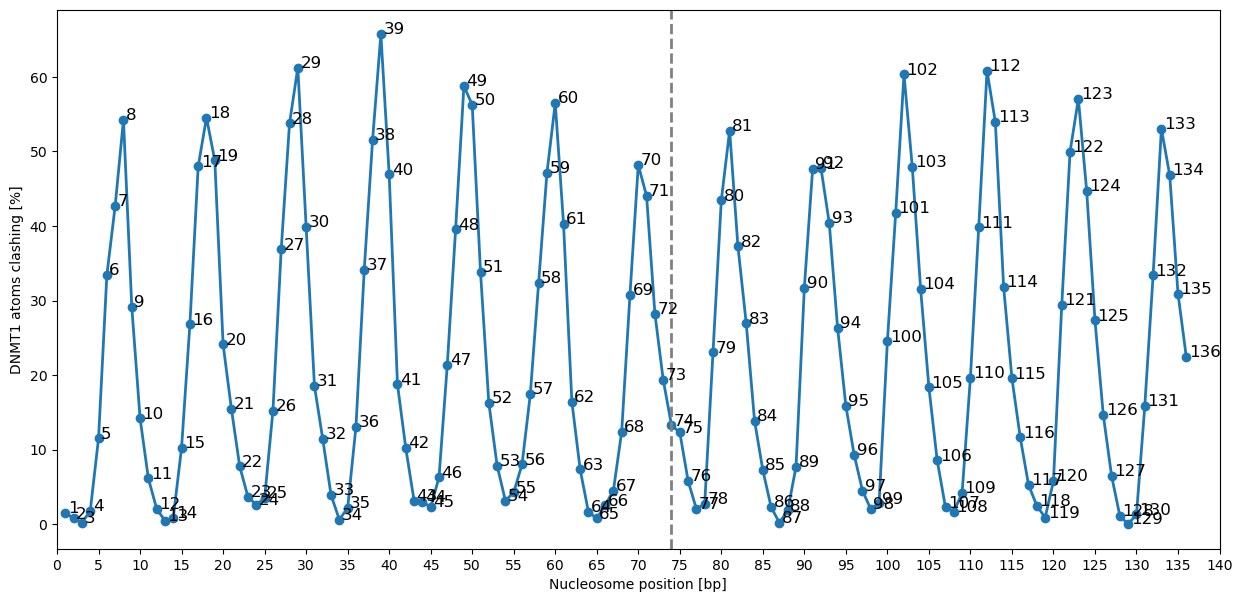

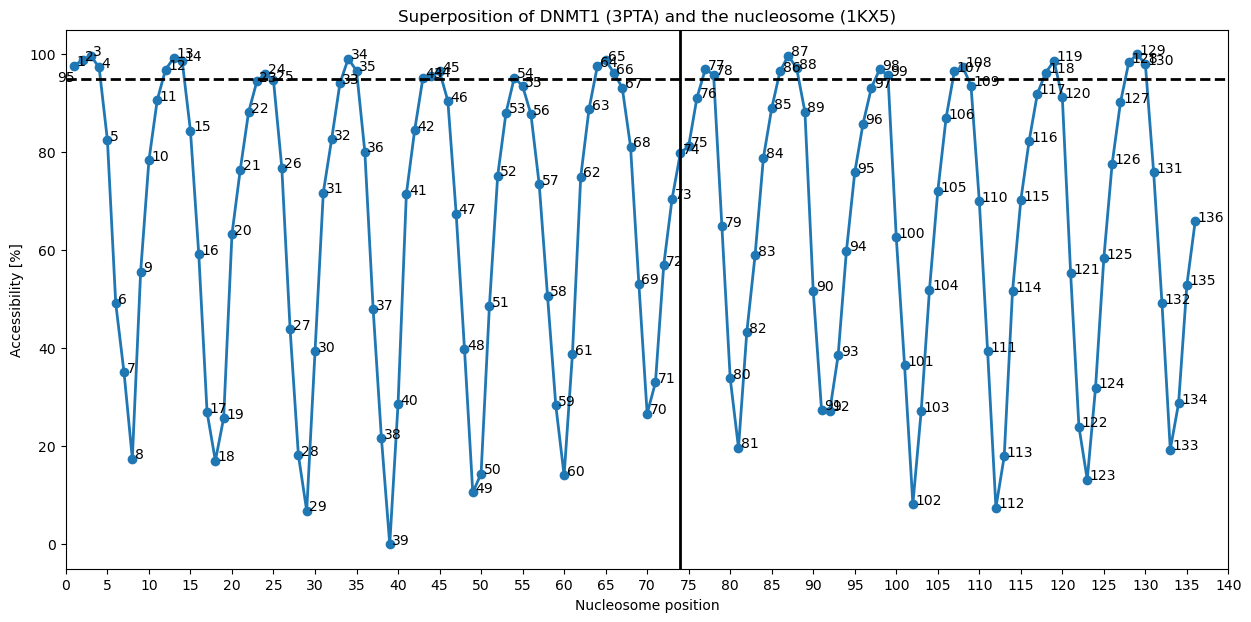

In [59]:
clash_dict_loc = steric_path + 'clash_dict'
info_dict_loc = steric_path + 'info_nbr_dict'
nome.plot_nbr_clashs(steric_path, clash_dict_loc, info_dict_loc)

#### HCG and Random HCG onto NDRs/NORs

In [60]:
# promo_NDR_file = data_path + 'GCH.NDR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.promoter.intersect.bed'
# outfile = data_path + 'promoter.NDR.HCG.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [61]:
# promo_NDR_file = data_path + 'GCH.NDR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.random.promoter.intersect.bed'
# outfile = data_path + 'promoter.NDR.HCG.random.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [62]:
# promo_NDR_file = data_path + 'GCH.NOR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.promoter.intersect.bed'
# outfile = data_path + 'promoter.NOR.HCG.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [63]:
# promo_NDR_file = data_path + 'GCH.NOR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.random.promoter.intersect.bed'
# outfile = data_path + 'promoter.NOR.HCG.random.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

#### Sliding Window Approach

In [64]:
def normalize_clash_dict(x_y_clash_dict):
    min_clash = min(x_y_clash_dict.values())
    max_clash = max(x_y_clash_dict.values())

    x_y_clash_dict_norm = {k: (float(v-min_clash)/float(max_clash-min_clash))*100 for k, v in x_y_clash_dict.items()}
    return x_y_clash_dict_norm

In [65]:
infile = steric_path + 'x_y_dict'
with open(infile, 'rb') as fin:
    x_y_clash_dict = pickle.load(fin)

x_y_clash_dict_norm = normalize_clash_dict(x_y_clash_dict)

meth_thres_range = [0, 10, 20]
clash_thres_range = [5, 10, 20, 50]

params = []
for clash_thres in clash_thres_range:
    for meth_thres in meth_thres_range:
        k = "c" + str(clash_thres) + "m" + str(meth_thres)
        params.append(k)

In [66]:
def make_sliding_windows_file(df_promo_nuc_WGBS, x_y_clash_dict_norm):
    column_names = ["trans_id", "refid", "NOR_nbr", "window_nbr", "nbr_meth_CpGs", "nuc_region_length", "meth_rates_window"] 
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
        
    all_nuc_pos = x_y_clash_dict_norm.keys()
    nbr_bases_nuc = len(all_nuc_pos)
    
    all_trans_ids = list(set(list(df_promo_nuc_WGBS["trans_id"])))
    
    c = 0
    for trans_id in all_trans_ids:
        refid = trans_id.split("-")[0]
        c += 1
        
        df_WGBS_tmp = df_promo_nuc_WGBS.loc[df_promo_nuc_WGBS["trans_id"] == trans_id]
        
        NOR_number = 1
        nuc_region_starts = list(set(list(df_WGBS_tmp["nuc_region_start_genome"])))
        for NOR_start in nuc_region_starts:
            df_NOR_tmp = df_WGBS_tmp.loc[df_WGBS_tmp["nuc_region_start_genome"] == NOR_start]
            
            start = NOR_start
            win_nbr = 1
                    
            list_meth_positions = list(df_NOR_tmp["meth_start_genome"])
            list_meth_rates = list(df_NOR_tmp["meth_rate"])
            meth_dict_promoter = dict(zip(list_meth_positions, list_meth_rates))
    
            NOR_end = list(df_NOR_tmp["nuc_region_end_genome"])[0]
            
            while start + nbr_bases_nuc - 1 <= NOR_end:
                #get relative and absolute position+methylation
                window_start = start
                window_end = window_start+nbr_bases_nuc-1
                
                meth_in_window_tmp = dict()
                for meth_start_genome in meth_dict_promoter.keys():
                    if (window_start <= meth_start_genome) & (meth_start_genome <= window_end):
                        rel_pos = meth_start_genome-window_start+1
                        
                        meth_rate = meth_dict_promoter[meth_start_genome]
                        meth_in_window_tmp[rel_pos] = meth_rate
                
                if len(meth_in_window_tmp) != 0:
                    #exp
                    info_dict["trans_id"].append(trans_id)
                    info_dict["refid"].append(refid)
                    info_dict["NOR_nbr"].append(NOR_number)
                    info_dict["window_nbr"].append(win_nbr)
                    info_dict["nbr_meth_CpGs"].append(len(meth_in_window_tmp.keys()))
                    info_dict["nuc_region_length"].append(np.abs(NOR_end-NOR_start)+1)
                    info_dict["meth_rates_window"].append(meth_in_window_tmp)
                
                start += 1
                win_nbr += 1
        
            NOR_number += 1
                
                
    #Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["trans_id"])),columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]

    return df

In [67]:
def calc_perc_exp_clash_ident(x_y_clash_dict_norm, meth_in_window_tmp, meth_thres, clash_thres):    
    count_ident = 0
    cpg_positions = meth_in_window_tmp.keys()
    for meth_pos in cpg_positions:
        meth_rate = meth_in_window_tmp[meth_pos]
        clash_perc = x_y_clash_dict[meth_pos] 
        
        if meth_rate > meth_thres:
            if clash_perc <= clash_thres:
                count_ident += 1
        else:
            if clash_perc > clash_thres:
                count_ident += 1
                
    nbr_cpgs = len(cpg_positions)
    perc_exp_clash_ident = float(count_ident)/float(nbr_cpgs)
    
    return perc_exp_clash_ident

In [68]:
import re

def calc_score_lists(df_sliding_windows, x_y_clash_dict_norm, params):
    column_names = ["refid_NOR", "trans_id", "refid", "NOR_nbr", "window_nbr", "nbr_CpGs", "nuc_region_length"] + params
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
        
    all_refids = list(df_sliding_windows["refid"])
    all_NOR_nbrs = list(df_sliding_windows["NOR_nbr"])
    refid_NORs = []
    for ref, nor in zip(all_refids, all_NOR_nbrs):
        refid_NORs.append(str(ref)+"-"+str(nor))
    
    info_dict["refid_NOR"].extend(refid_NORs)
    info_dict["trans_id"].extend(list(df_sliding_windows["trans_id"]))
    info_dict["refid"].extend(all_refids)
    info_dict["NOR_nbr"].extend(all_NOR_nbrs)
    info_dict["window_nbr"].extend( list(df_sliding_windows["window_nbr"]))
    info_dict["nbr_CpGs"].extend(list(df_sliding_windows["nbr_meth_CpGs"])  )
    info_dict["nuc_region_length"].extend(list(df_sliding_windows["nuc_region_length"]))

    all_scores =  list(df_sliding_windows["meth_rates_window"]) #{34: 0.0, 35: 0.0,...}
    c = 0
    for row_df in range(len(all_scores)):
        c += 1
        
        # meth_rates_window = ast.literal_eval(all_scores[row_df])
        meth_rates_window = all_scores[row_df]
    
        for param_str in params:
            clash_thres = float(re.findall(r'\d+', param_str)[0]) #c5m0
            meth_thres = float(re.findall(r'\d+', param_str)[1])
            
            perc_clash_ident = calc_perc_exp_clash_ident(x_y_clash_dict_norm, meth_rates_window, meth_thres, clash_thres)
            info_dict[param_str].append(perc_clash_ident)
            
    #Built dataframe 
    df_scores = pd.DataFrame(0, index = np.arange(len(info_dict[column_names[0]])),columns = column_names)
    for feat in column_names:
        df_scores[feat] = info_dict[feat]

    return df_scores

In [69]:
def calculate_cohens_d(list_EXP,list_RAND):
    mEXP = np.mean(list_EXP)
    sdEXP = np.std(list_EXP)
    
    mRAND = np.mean(list_RAND)
    sdRAND = np.std(list_RAND)
    
    denom = np.sqrt(float(sdEXP**2 + sdRAND**2)/2.0)
    cohens_d = float(mEXP-mRAND)/float(denom)
    
    return cohens_d

def make_df_p_vals_cohens_d(df_scores_EXP, df_scores_RAND, params):
    column_names = ["nbr_CpGs", "parameter", "N_EXP", "N_RAND", "mean_EXP", "median_EXP", "std_EXP", "mean_RAND",
                    "median_RAND", "std_RAND", "cohens_d", "is_normal_EXP", "is_normal_RAND", "pval_ttest",
                    "t_stat", "pval_ranksums", "pval_ks_2samp"]
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []

    nbr_CpGs_list = list(set(list(df_scores_EXP["nbr_CpGs"])))

    for nbr_CpGs in nbr_CpGs_list:
        df_scores_EXP_tmp = df_scores_EXP.loc[df_scores_EXP["nbr_CpGs"] == nbr_CpGs]
        df_scores_RAND_tmp = df_scores_RAND.loc[df_scores_RAND["nbr_CpGs"] == nbr_CpGs]
                    
        for p in range(len(params)):
            par_name = params[p]
            EXP_scores = list(df_scores_EXP_tmp[par_name])
            RAND_scores = list(df_scores_RAND_tmp[par_name])
            
            info_dict["nbr_CpGs"].append(nbr_CpGs)
            info_dict["parameter"].append(par_name)
            
            info_dict["N_EXP"].append(len(EXP_scores))
            info_dict["N_RAND"].append(len(RAND_scores))
            
            info_dict["mean_EXP"].append(np.mean(EXP_scores))
            info_dict["median_EXP"].append(np.median(EXP_scores))
            info_dict["std_EXP"].append(np.std(EXP_scores))
            
            info_dict["mean_RAND"].append(np.mean(RAND_scores))
            info_dict["median_RAND"].append(np.median(RAND_scores))
            info_dict["std_RAND"].append(np.std(RAND_scores))
            
            #EFFECT SIZE
            cohens_d = calculate_cohens_d(EXP_scores, RAND_scores)
            info_dict["cohens_d"].append(cohens_d)
            
            #STAT TESTS
            #is normal distributed? This function tests the null hypothesis that a sample comes from a normal distribution. If small -> ost likely not normal dustributed
            pval_normal_EXP = stats.normaltest(EXP_scores)[1] if len(EXP_scores) >= 8 else -1
            pval_normal_RAND = stats.normaltest(RAND_scores)[1] if len(EXP_scores) >= 8 else -1
            
            #students t
            ttest_res = stats.ttest_ind(EXP_scores,RAND_scores,equal_var = False)
            t_stat = ttest_res[0]
            p_val_ttest = float(ttest_res[1])/2.0
            
            #ranksums, kstest
            ranksums = scipy.stats.ranksums(EXP_scores,RAND_scores)[1]
            ks_2samp = scipy.stats.ks_2samp(EXP_scores,RAND_scores)[1]
    
            info_dict["is_normal_EXP"].append(pval_normal_EXP)
            info_dict["is_normal_RAND"].append(pval_normal_RAND)
            info_dict["pval_ttest"].append(p_val_ttest)
            info_dict["t_stat"].append(t_stat)
            info_dict["pval_ranksums"].append(ranksums)
            info_dict["pval_ks_2samp"].append(ks_2samp)
            
    #Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["nbr_CpGs"])),columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]

    return df

In [70]:
def plot_nbr_CpGs_cohensd(df_values, params):
    plt.figure(figsize=(15,7))
    ax = plt.subplot(1,1,1)
    
    nbr_CpGs_list = sorted(list(set(list(df_values["nbr_CpGs"]))))

    for par_name in params:
        
        df_values_tmp = df_values.loc[df_values["parameter"] == par_name]
        
        x_nbr_cpg_vals = list(df_values_tmp["nbr_CpGs"])
        y_cohens_d_vals = list(df_values_tmp["cohens_d"])
        
        if "m0" in par_name:
            c = "#117A65"
        if "m10" in par_name:
            c = "#45B39D"
        if "m20" in par_name:
            c = "#EB984E"
        if "c5" in par_name:
            m = "*"
            ms = 15
        if "c10" in par_name:
            m = "^"
            ms = 10
        if "c20" in par_name:
            m = "s"
            ms = 10
        if "c50" in par_name:
            m = "o"
            ms = 10
        
        
        plt.plot(x_nbr_cpg_vals, y_cohens_d_vals, linestyle="-", color=c, marker=m, markersize=ms, label=par_name)
    
    
    plt.axhline(y=0.2, linewidth=1, color = '#2C3E50',linestyle='--')
    plt.axhline(y=0.5, linewidth=1, color = '#2C3E50',linestyle='--')
    plt.axhline(y=0.8, linewidth=1, color = '#2C3E50',linestyle='--')
    
    e = 0.02
    ax.text(-1.8,0.2+e,"Small ES")
    ax.text(-1.8,0.5+e,"Medium ES")
    ax.text(-1.8,0.8+e,"Large ES")

    ax.set_ylabel("Cohen's d")
    ax.set_xlabel("Number of CpGs in sliding window")   

    plt.xlim(-2,35)
    plt.ylim(-3,3)

    legend = ax.legend(loc="lower left",ncol=4,frameon = 1,prop={'size':14})
    legend.get_frame().set_facecolor('white')

In [71]:
def plot_pvals_cohensd(df_values,params):
    
    plt.figure(figsize=(20,7))
    ax = plt.subplot(1,1,1)
    
    nbr_CpGs_list = sorted(list(set(list(df_values["nbr_CpGs"]))))
    
    for par_name in params:
        df_values_tmp = df_values.loc[df_values["parameter"] == par_name]
        
        x_nbr_cpg_vals = list(df_values_tmp["nbr_CpGs"])
        y_pvals_vals = list(df_values_tmp["pval_ranksums"])
        
        y_pvals_log = [-np.log10(p_val) if p_val != 0.0 else 310 for p_val in y_pvals_vals]
        
        if "m0" in par_name:
            c = "#117A65"
        if "m10" in par_name:
            c = "#45B39D"
        if "m20" in par_name:
            c = "#EB984E"
        if "c5" in par_name:
            m = "*"
            ms = 15
        if "c10" in par_name:
            m = "^"
            ms = 10
        if "c20" in par_name:
            m = "s"
            ms = 10
        if "c50" in par_name:
            m = "o"
            ms = 10
        
        
        plt.plot(x_nbr_cpg_vals,y_pvals_log,linestyle="-",color=c,marker=m,markersize=ms,label=par_name)
    
    
    #plt.axhline(y=-np.log10(0.05), linewidth=1, color = '#5D6D7E',linestyle='-')
    #plt.axhline(y=-np.log10(0.01), linewidth=1, color = '#515A5A',linestyle='-')

    ax.set_ylabel("-log10(p-value)")
    ax.set_xlabel("Number of CpGs in sliding window")   

    # plt.xlim(-2,35)
    # plt.ylim(0,450)

    legend = ax.legend(loc="upper right",ncol=4,frameon = 1,prop={'size':14})
    legend.get_frame().set_facecolor('white')

In [72]:
def plot_score_distribution(df_scores_EXP,df_scores_RAND,params):

    fig = plt.figure(figsize=(15,15))
    for idx, p in enumerate(range(len(params))):
        par_name = params[p]
        EXP_scores = list(df_scores_EXP[par_name])
        RAND_scores = list(df_scores_RAND[par_name])
                
        ttest_res = stats.ttest_ind(EXP_scores,RAND_scores,equal_var = False)
        t = ttest_res[0]
        p_val = float(ttest_res[1])/2.0
        
        
        ranksums = scipy.stats.ranksums(EXP_scores,RAND_scores)[1]
        ks_2samp = scipy.stats.ks_2samp(EXP_scores,RAND_scores)[1]

        #EFFECT SIZE
        cohens_d = calculate_cohens_d(EXP_scores,RAND_scores)
        
        #test for normal ditribution
        pval_normal_EXP = stats.normaltest(EXP_scores)[1] if len(EXP_scores) >= 8 else -1   #This function tests the null hypothesis that a sample comes from a normal distribution. If small -> ost likely not normal dustributed
        pval_normal_RAND = stats.normaltest(RAND_scores)[1] if len(EXP_scores) >= 8 else -1
                
        #PLOTTING
        bins = 20    
        
        ax = plt.subplot(4, 3, idx + 1)
        
        c1 = "#5499C7"
        c2 = "#7DCEA0"
        
        ax.annotate(par_name, xy=(0, 1), xycoords='axes fraction', fontsize=10, xytext=(5, -5), textcoords='offset points',ha='left', va='top') #region_name+" - "+

        plt.hist(np.array(EXP_scores), bins=bins, color=c1, label="Experimental", alpha=0.8)
        plt.hist(np.array(RAND_scores), bins=bins, color=c2, label="Random", alpha=0.8)
        
        # legend = ax.legend(loc="upper right",frameon = 1,prop={'size':16})
        # legend.get_frame().set_facecolor('white')
        
        plt.xlim(0,1)
        
        ax.set_xlabel("Matching score")
        ax.set_ylabel("Density")

In [73]:
def plot_hist_distr_CpGs(df_scores):  
    
    nbr_CpG_list = list(df_scores["nbr_CpGs"])
    x = sorted(list(set(nbr_CpG_list)))  
    y = [nbr_CpG_list.count(c) for c in x]  
    
    tot = len(nbr_CpG_list)
    p = 0
    for nbr_cpg,freq in zip(x,y):
        perc = (float(freq)/float(tot))*100
        p += perc
    
    for nbr_cpg_pos in range(len(x)):
        nbr_cpg = x[nbr_cpg_pos]
        freq = sum(y[nbr_cpg_pos:])
        perc = (float(freq)/float(tot))*100
    
    #PLOTTING
    bins = len(set(nbr_CpG_list))   
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    c1 = "#515A5A"
    c2 = "#7DCEA0"
    
    plt.hist(np.array(nbr_CpG_list), bins=bins, color=c1)
       
    ax.set_xlabel("Number of CpGs")
    ax.set_ylabel("Density")
    
    xticks = range(0,len(set(nbr_CpG_list)),5)
    plt.xlim(0,len(set(nbr_CpG_list))+1)
    plt.xticks([i+0.2 for i in xticks],xticks)


##### Sliding Window for NDRs

In [74]:
infile = data_path + 'promoter.NDR.HCG.intersect.bed'
df = nome.get_nuc_pos_methylation(infile)

infile = data_path + 'promoter.NDR.HCG.random.intersect.bed'
df_random = nome.get_nuc_pos_methylation(infile)

In [75]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893701,893702,16.67
1,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893735,893736,25.00
2,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893757,893758,0.00
3,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893785,893786,0.00
4,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893789,893790,0.00


In [76]:
df_random.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893701,893702,33.33
1,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893735,893736,0.00
2,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893757,893758,0.00
3,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893785,893786,0.00
4,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,400,893789,893790,0.00


In [77]:
df_sliding_windows = make_sliding_windows_file(df, x_y_clash_dict_norm)
df_sliding_windows_random = make_sliding_windows_file(df_random, x_y_clash_dict_norm)

In [78]:
df_sliding_windows.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_006786-7912125,NM_006786,1,15,1,201,{136: 50.0}
1,NM_006786-7912125,NM_006786,1,16,1,201,{135: 50.0}
2,NM_006786-7912125,NM_006786,1,17,1,201,{134: 50.0}
3,NM_006786-7912125,NM_006786,1,18,1,201,{133: 50.0}
4,NM_006786-7912125,NM_006786,1,19,1,201,{132: 50.0}


In [79]:
df_sliding_windows_random.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_006786-7912125,NM_006786,1,15,1,201,{136: 0.0}
1,NM_006786-7912125,NM_006786,1,16,1,201,{135: 0.0}
2,NM_006786-7912125,NM_006786,1,17,1,201,{134: 0.0}
3,NM_006786-7912125,NM_006786,1,18,1,201,{133: 0.0}
4,NM_006786-7912125,NM_006786,1,19,1,201,{132: 0.0}


In [80]:
df_score_exp = calc_score_lists(df_sliding_windows, x_y_clash_dict_norm, params)
df_score_random = calc_score_lists(df_sliding_windows_random, x_y_clash_dict_norm, params)

In [81]:
df_score_exp.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_006786-1,NM_006786-7912125,NM_006786,1,15,1,201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,NM_006786-1,NM_006786-7912125,NM_006786,1,16,1,201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,NM_006786-1,NM_006786-7912125,NM_006786,1,17,1,201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,NM_006786-1,NM_006786-7912125,NM_006786,1,18,1,201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NM_006786-1,NM_006786-7912125,NM_006786,1,19,1,201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [82]:
df_score_random.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_006786-1,NM_006786-7912125,NM_006786,1,15,1,201,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,NM_006786-1,NM_006786-7912125,NM_006786,1,16,1,201,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,NM_006786-1,NM_006786-7912125,NM_006786,1,17,1,201,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,NM_006786-1,NM_006786-7912125,NM_006786,1,18,1,201,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,NM_006786-1,NM_006786-7912125,NM_006786,1,19,1,201,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [83]:
df_pvalues = make_df_p_vals_cohens_d(df_score_exp, df_score_random, params)

/home/kevin/miniconda3/envs/helms-lab/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/kevin/miniconda3/envs/helms-lab/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1606: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/home/kevin/miniconda3/envs/helms-lab/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1808: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)
/home/kevin/miniconda3/envs/helms-lab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation

In [84]:
df_pvalues.head()

,nbr_CpGs,parameter,N_EXP,N_RAND,mean_EXP,median_EXP,std_EXP,mean_RAND,median_RAND,std_RAND,cohens_d,is_normal_EXP,is_normal_RAND,pval_ttest,t_stat,pval_ranksums,pval_ks_2samp
0,1,c5m0,30948,30948,0.552410,1.0,0.497246,0.538452,1.0,0.498519,0.028037,0.0,0.0,0.000244,3.487533,0.002634,0.004764
1,1,c5m10,30948,30948,0.552410,1.0,0.497246,0.538452,1.0,0.498519,0.028037,0.0,0.0,0.000244,3.487533,0.002634,0.004764
2,1,c5m20,30948,30948,0.562330,1.0,0.496100,0.549826,1.0,0.497511,0.025170,0.0,0.0,0.000871,3.131020,0.007055,0.015691
3,1,c10m0,30948,30948,0.528952,1.0,0.499161,0.521391,1.0,0.499542,0.015142,0.0,0.0,0.029817,1.883523,0.103297,0.337541
4,1,c10m10,30948,30948,0.528952,1.0,0.499161,0.521391,1.0,0.499542,0.015142,0.0,0.0,0.029817,1.883523,0.103297,0.337541


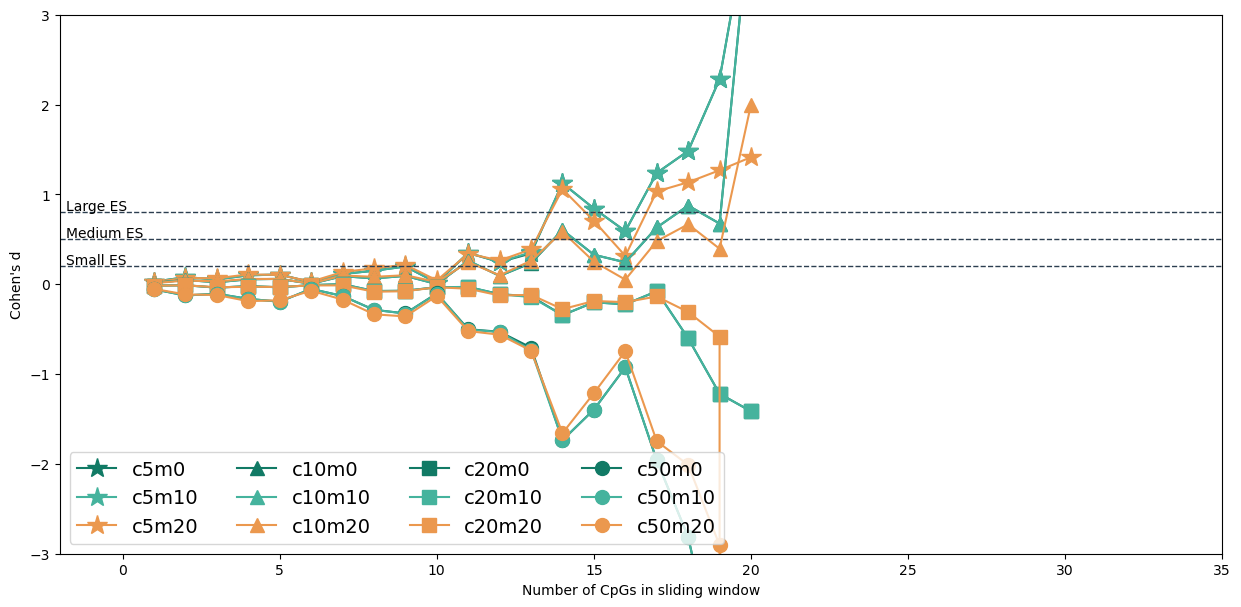

In [85]:
plot_nbr_CpGs_cohensd(df_pvalues, params)

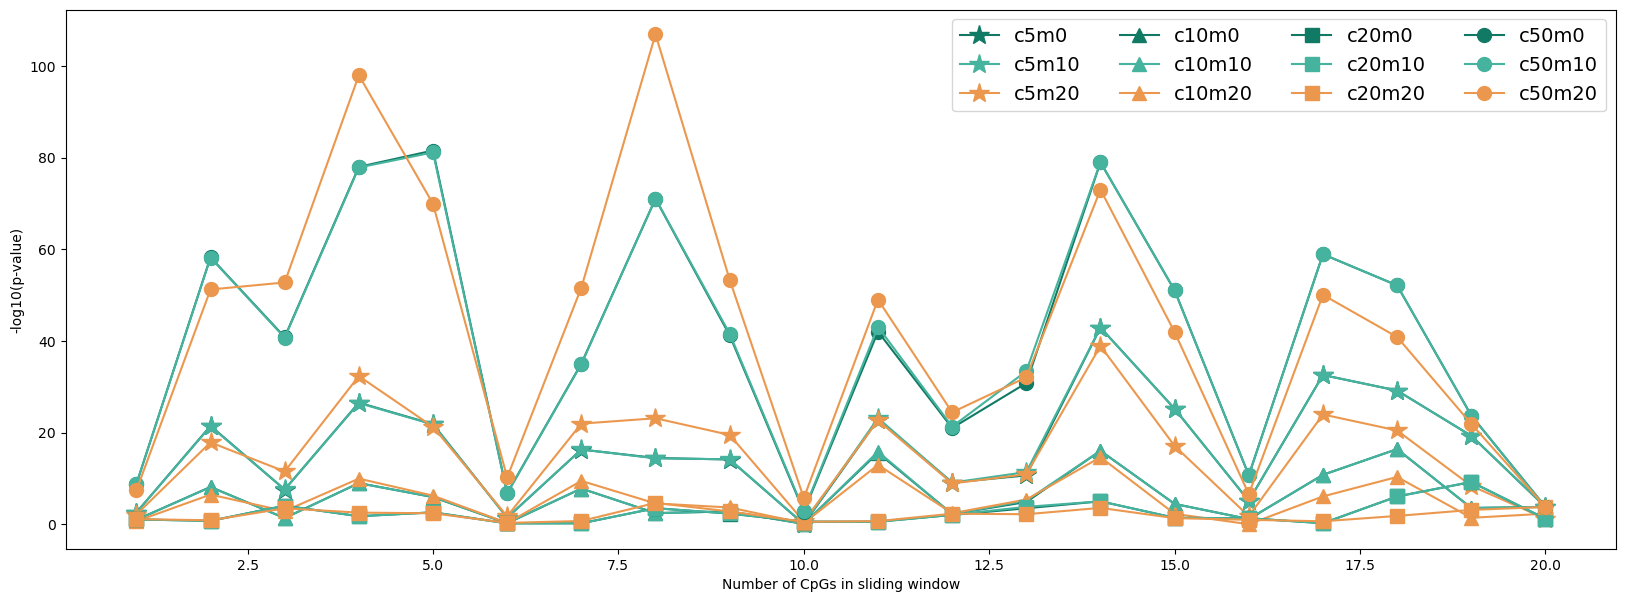

In [86]:
plot_pvals_cohensd(df_pvalues, params)

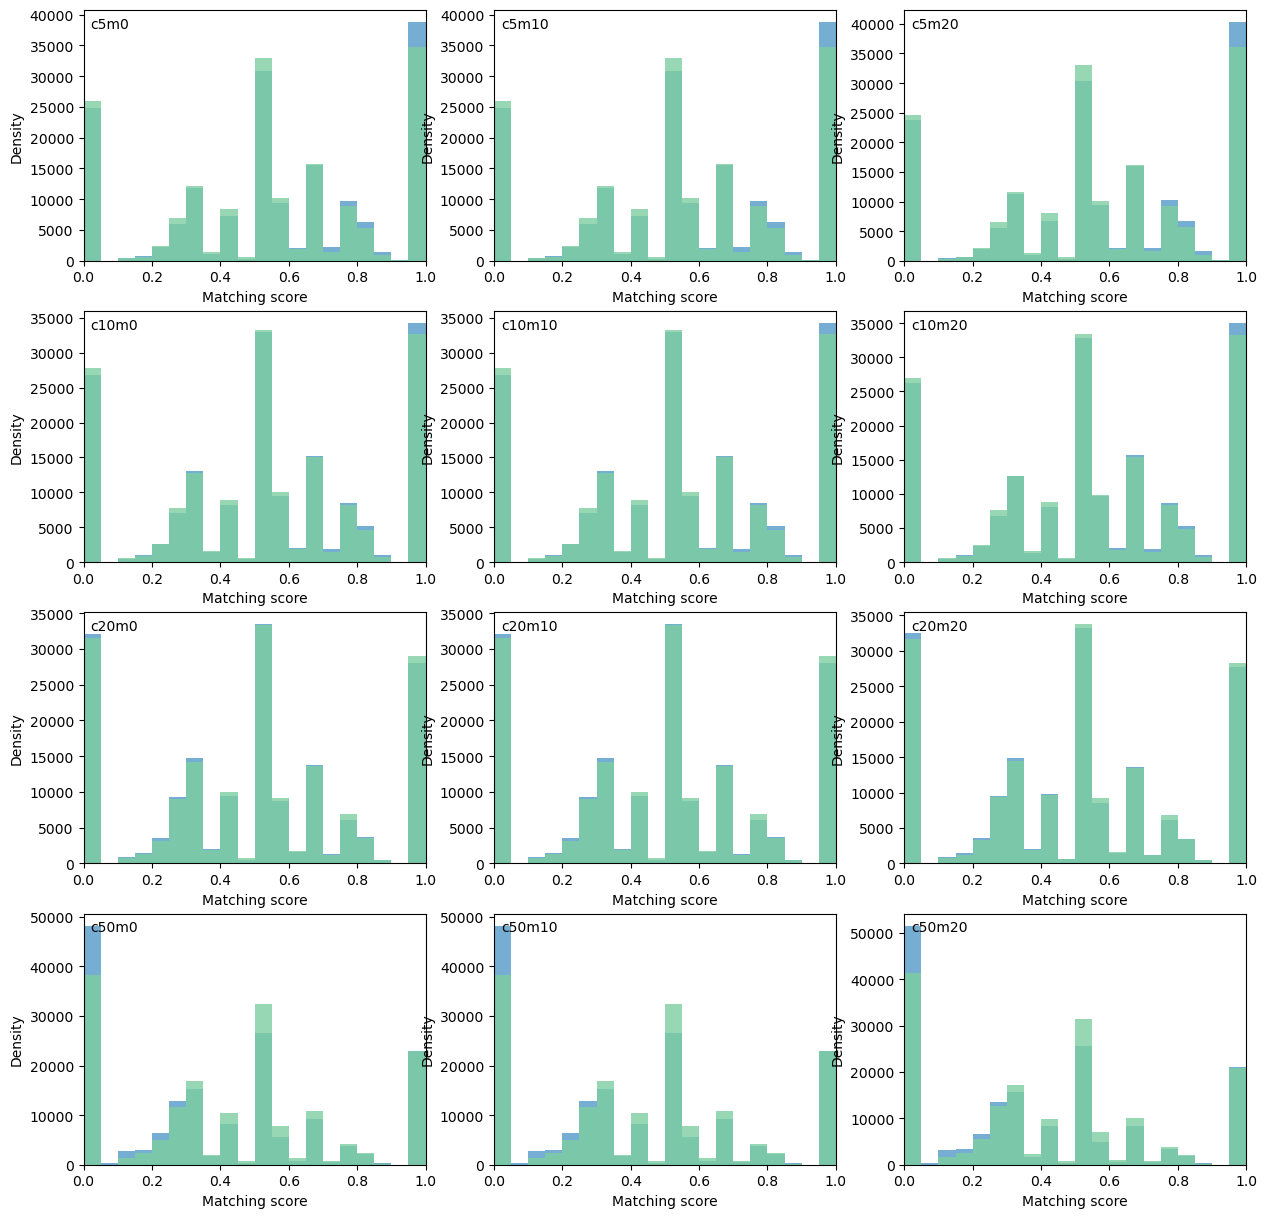

In [87]:
plot_score_distribution(df_score_exp,df_score_random,params)

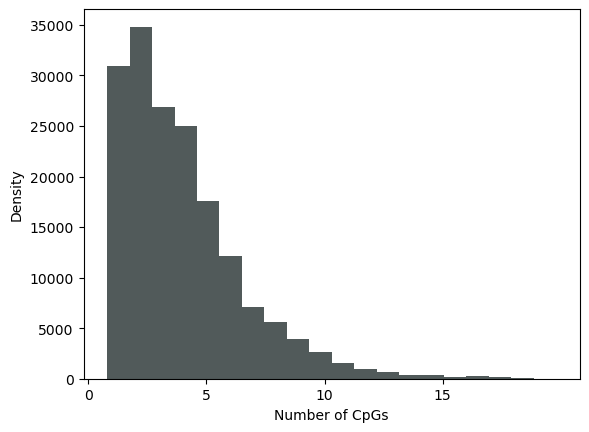

In [88]:
plot_hist_distr_CpGs(df_score_exp)

##### Sliding Windows for NORs

In [89]:
infile = data_path + 'promoter.NOR.HCG.intersect.bed'
df = nome.get_nuc_pos_methylation(infile)

infile = data_path + 'promoter.NOR.HCG.random.intersect.bed'
df_random = nome.get_nuc_pos_methylation(infile)

In [90]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953596,953597,80.0
1,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953641,953642,100.0
2,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953728,953729,100.0
3,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953753,953754,100.0
4,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953768,953769,100.0


In [91]:
df_random.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953596,953597,0.0
1,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953641,953642,50.0
2,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953728,953729,100.0
3,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953753,953754,100.0
4,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955036,955736,700,953768,953769,0.0


In [92]:
df_sliding_windows = make_sliding_windows_file(df, x_y_clash_dict_norm)
df_sliding_windows_random = make_sliding_windows_file(df_random, x_y_clash_dict_norm)

In [93]:
df_sliding_windows.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_001198978-40838304,NM_001198978,1,216,1,1001,{136: 0.0}
1,NM_001198978-40838304,NM_001198978,1,217,1,1001,{135: 0.0}
2,NM_001198978-40838304,NM_001198978,1,218,1,1001,{134: 0.0}
3,NM_001198978-40838304,NM_001198978,1,219,1,1001,{133: 0.0}
4,NM_001198978-40838304,NM_001198978,1,220,1,1001,{132: 0.0}


In [94]:
df_sliding_windows_random.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_001198978-40838304,NM_001198978,1,216,1,1001,{136: 33.33}
1,NM_001198978-40838304,NM_001198978,1,217,1,1001,{135: 33.33}
2,NM_001198978-40838304,NM_001198978,1,218,1,1001,{134: 33.33}
3,NM_001198978-40838304,NM_001198978,1,219,1,1001,{133: 33.33}
4,NM_001198978-40838304,NM_001198978,1,220,1,1001,{132: 33.33}


In [95]:
df_score_exp = calc_score_lists(df_sliding_windows, x_y_clash_dict_norm, params)
df_score_random = calc_score_lists(df_sliding_windows_random, x_y_clash_dict_norm, params)

In [96]:
df_score_exp.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_001198978-1,NM_001198978-40838304,NM_001198978,1,216,1,1001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,NM_001198978-1,NM_001198978-40838304,NM_001198978,1,217,1,1001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,NM_001198978-1,NM_001198978-40838304,NM_001198978,1,218,1,1001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,NM_001198978-1,NM_001198978-40838304,NM_001198978,1,219,1,1001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,NM_001198978-1,NM_001198978-40838304,NM_001198978,1,220,1,1001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [97]:
df_score_random.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_001198978-1,NM_001198978-40838304,NM_001198978,1,216,1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,NM_001198978-1,NM_001198978-40838304,NM_001198978,1,217,1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,NM_001198978-1,NM_001198978-40838304,NM_001198978,1,218,1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,NM_001198978-1,NM_001198978-40838304,NM_001198978,1,219,1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NM_001198978-1,NM_001198978-40838304,NM_001198978,1,220,1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [98]:
df_pvalues = make_df_p_vals_cohens_d(df_score_exp, df_score_random, params)

/home/kevin/miniconda3/envs/helms-lab/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [99]:
df_pvalues.head()

,nbr_CpGs,parameter,N_EXP,N_RAND,mean_EXP,median_EXP,std_EXP,mean_RAND,median_RAND,std_RAND,cohens_d,is_normal_EXP,is_normal_RAND,pval_ttest,t_stat,pval_ranksums,pval_ks_2samp
0,1,c5m0,13058,13058,0.574284,1.0,0.494451,0.552458,1.0,0.497241,0.044017,0.0,0.0,0.000188,3.556530,0.002254,0.003918
1,1,c5m10,13058,13058,0.575586,1.0,0.494254,0.552458,1.0,0.497241,0.046652,0.0,0.0,0.000082,3.769422,0.001209,0.001823
2,1,c5m20,13058,13058,0.579721,1.0,0.493604,0.556823,1.0,0.496761,0.046241,0.0,0.0,0.000094,3.736234,0.001353,0.002093
3,1,c10m0,13058,13058,0.539975,1.0,0.498399,0.526421,1.0,0.499301,0.027172,0.0,0.0,0.014068,2.195497,0.057825,0.179810
4,1,c10m10,13058,13058,0.540665,1.0,0.498344,0.526421,1.0,0.499301,0.028556,0.0,0.0,0.010524,2.307261,0.046209,0.139997


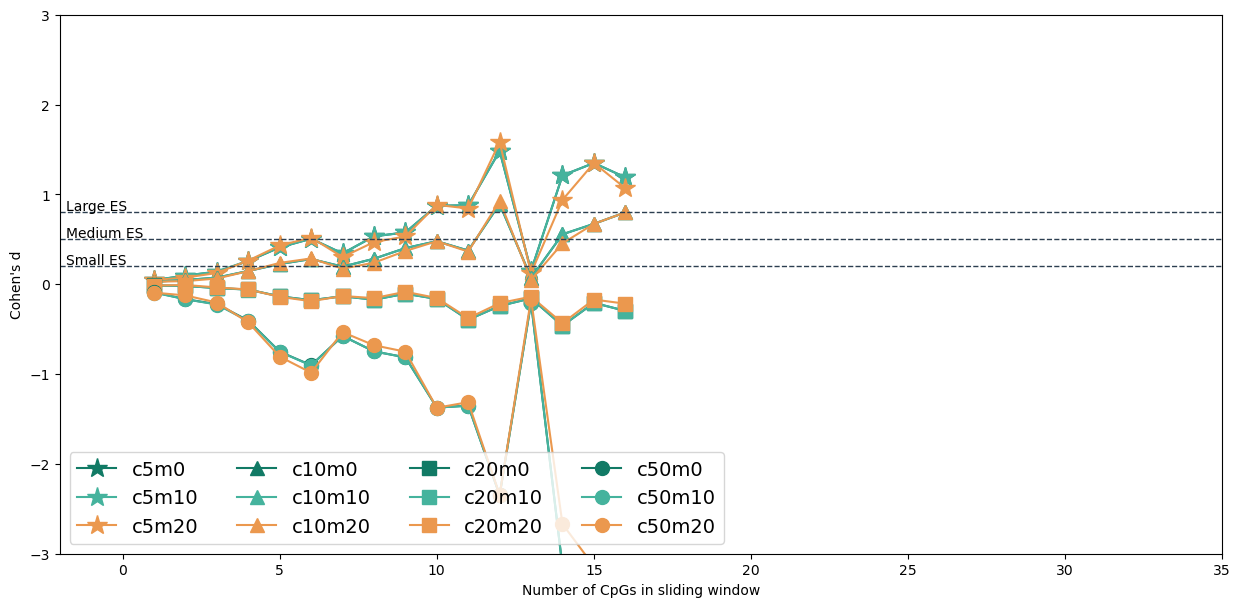

In [100]:
plot_nbr_CpGs_cohensd(df_pvalues, params)

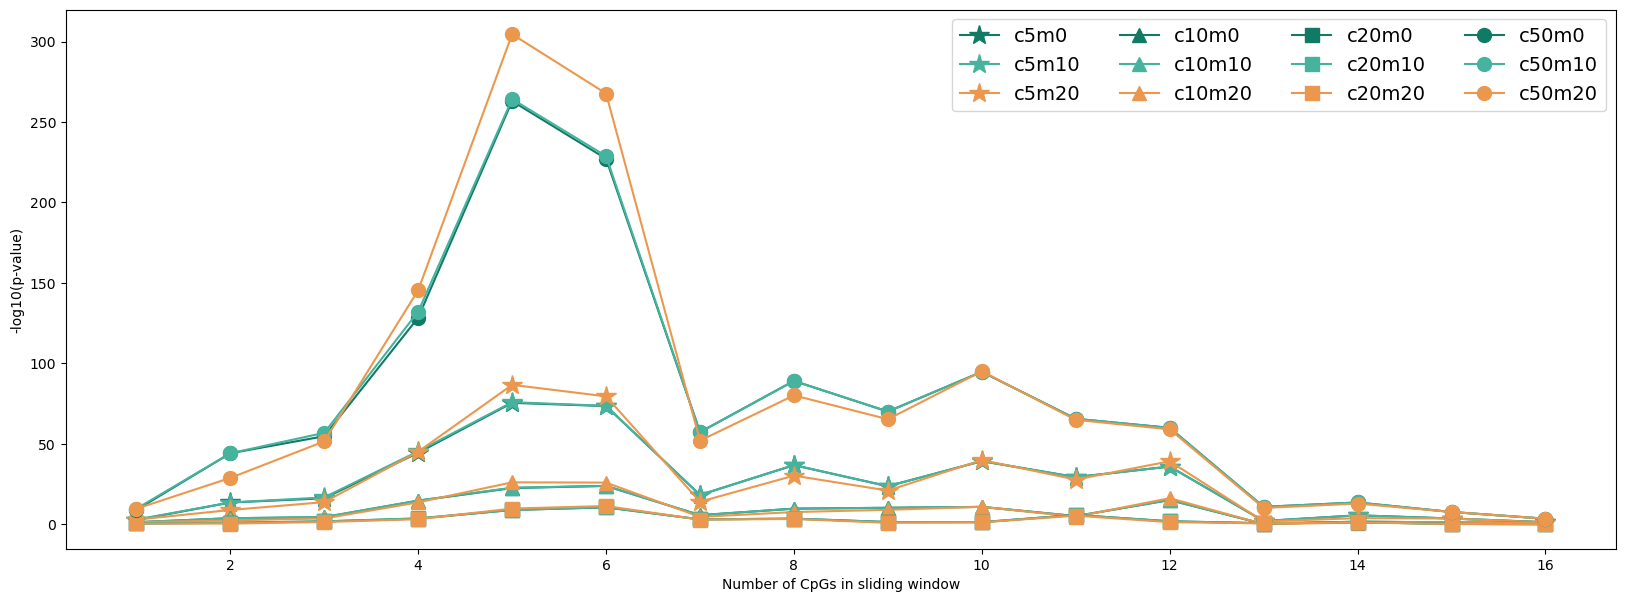

In [101]:
plot_pvals_cohensd(df_pvalues, params)

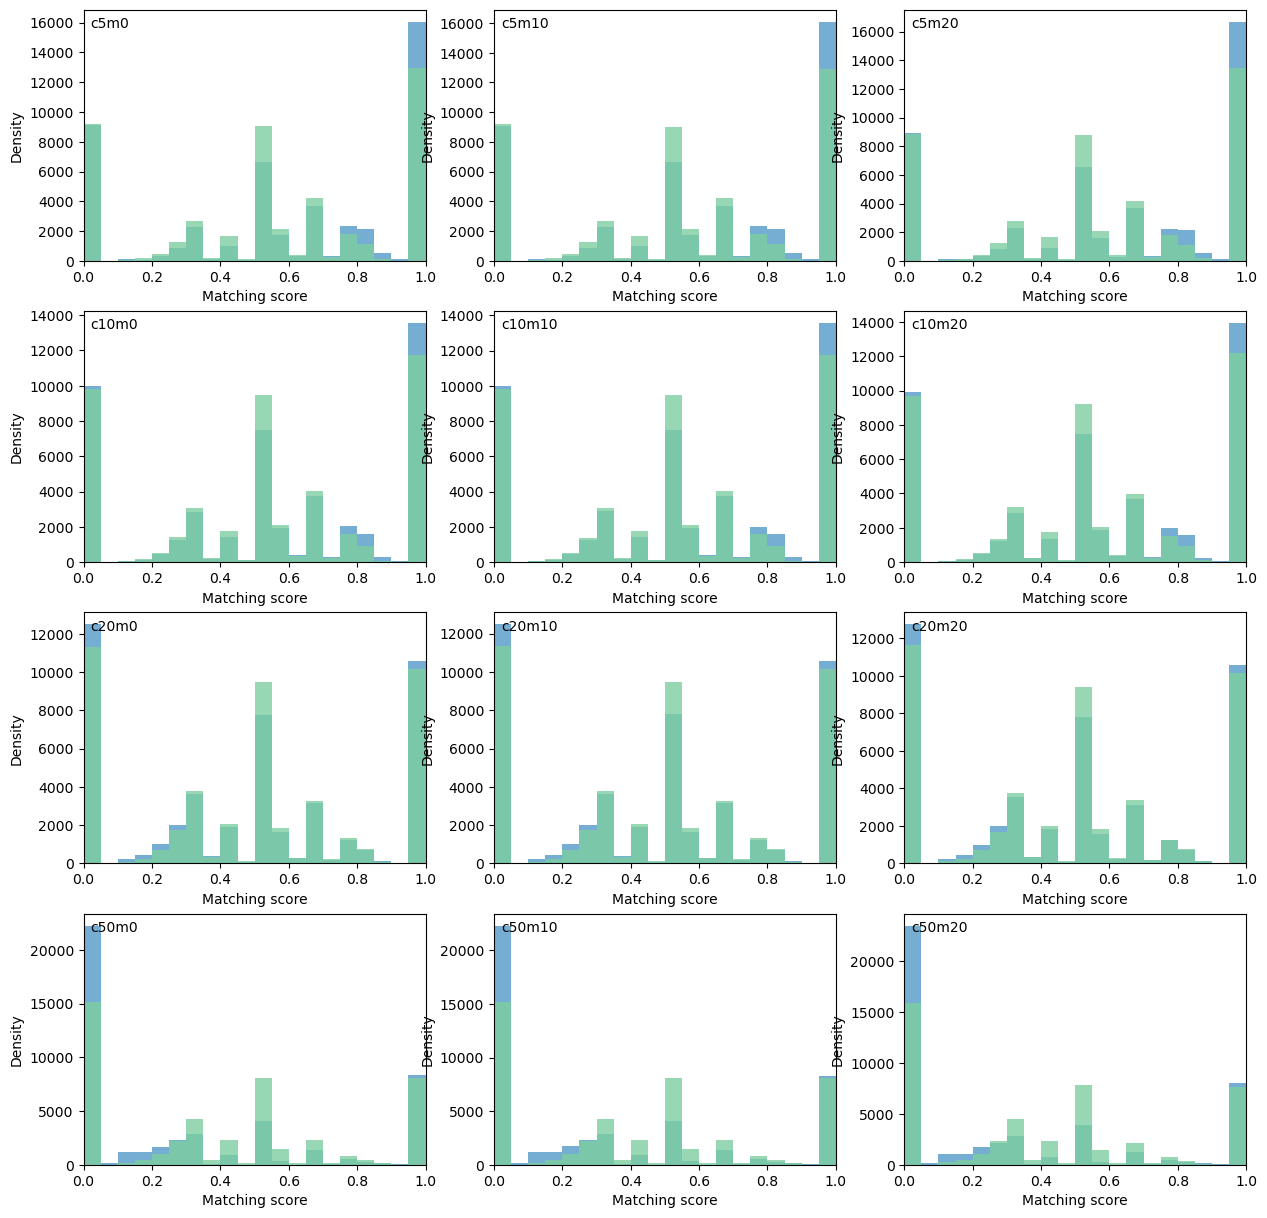

In [102]:
plot_score_distribution(df_score_exp,df_score_random,params)

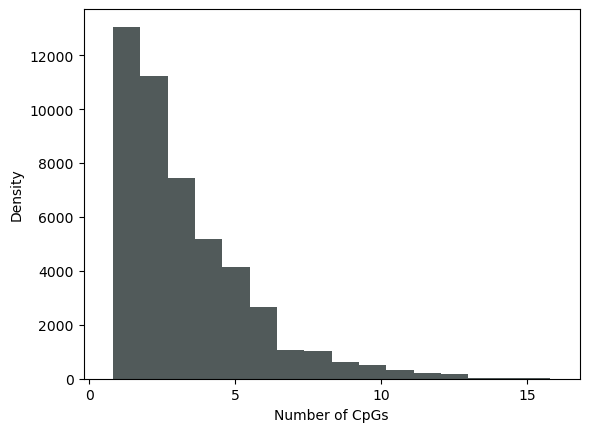

In [103]:
plot_hist_distr_CpGs(df_score_exp)